In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Done!


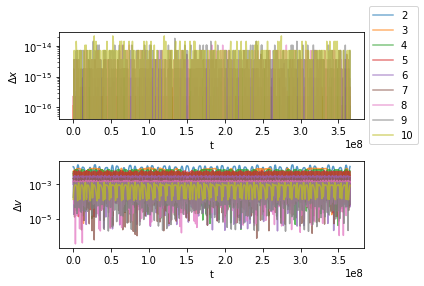

In [24]:
# Convert orbital to cartesian coordinates
# (a, e, inclination, lon_asc_node, arg_peri, true_anom)
# (r, v) = (x, y, z, v_x, v_y, v_z)

#set mu = 1
mu = 1

fig, (ax1, ax2) = plt.subplots(2)

for k in range(2, 11):
    
    data_path = "id0000"
    if(k < 10):
        data_path = data_path + "0" + str(k)
    else:
        data_path = data_path + str(k) 
        
    data = pd.read_csv("data/orig_data/" + data_path + "-EL.csv")

    # Extract required data
    t = data['t']
    a = data['a']
    e = data['e']
    inclination = data['inclination'] * np.pi / 180
    lon_asc_node = data['lon_asc_node'] * np.pi / 180
    arg_peri = data['arg_peri'] * np.pi / 180
    true_anom = data['true_anom'] * np.pi / 180
    

    # Calculate x, y, z, v_x, v_y, v_z
    xh = 0
    yh = 0
    zh = 0
    vxh = 0 
    vyh = 0 
    vz = 0

    h = np.sqrt((1 - e**2) * a * mu) # Specific angular momentum
    E = -1 * mu / (2 * a) # Energy
    v = np.sin(true_anom) * h * e / (a * (1 - e**2))
    r = mu / (v**2 / 2 - E)
    
    # Convert r and h to vectors to get x, y, and z components
    
    xh = r * np.cos(inclination) * np.cos(true_anom + arg_peri + lon_asc_node)
    yh = r * np.cos(inclination) * np.sin(true_anom + arg_peri + lon_asc_node)
    zh = r * np.sin(inclination)
    
#     xh = r * np.cos(lon_asc_node) * np.cos(arg_peri + true_anom) - np.sin(lon_asc_node) * np.cos(inclination) * np.sin(arg_peri + true_anom)
#     yh = r * np.sin(lon_asc_node) * np.cos(arg_peri + true_anom) + np.cos(lon_asc_node) * np.cos(inclination) * np.sin(arg_peri + true_anom)
#     zh = r * np.sin(arg_peri + true_anom) * np.sin(inclination)
    r_vec = np.asarray([xh, yh, zh])
    
    h_vec = []
    h_vec.append(h * np.cos(inclination)) # h_x
    h_vec.append(h * np.sin(inclination) * np.cos(lon_asc_node)) # h_y
    h_vec.append(h * np.sin(inclination) * np.sin(lon_asc_node)) # h_z
    h_vec = np.asarray(h_vec)
    
    r_cross_h = np.cross(r_vec.T, h_vec.T)
    r_cross_h = r_cross_h.T
    
    vxh = (v * r * xh - r_cross_h[0]) / r**2
    vyh = (v * r * yh - r_cross_h[1]) / r**2
    vz = (v * r * zh - r_cross_h[2]) / r**2


    # Export to csv file
    export_headers = ['t', 'xh', 'yh', 'zh', 'vxh', 'vyh', 'vz']

    export_data = pd.DataFrame(data.iloc[:,0])#, columns =['t'])
    # export_data[export_headers[0]] = data.iloc[:,0]
    export_data[export_headers[1]] = xh
    export_data[export_headers[2]] = yh
    export_data[export_headers[3]] = zh
    export_data[export_headers[4]] = vxh
    export_data[export_headers[5]] = vyh
    export_data[export_headers[6]] = vz
    
#     print(export_data.iloc[:,0])
#     print(export_data.iloc[:,1])
    
    # Make plots for delta_R vs t, and delta_V vs t
    orig_data = pd.read_csv("data/orig_data/" + data_path + "-XV.csv")
    
    export_r = np.sqrt(xh**2 + yh**2 + zh**2)
    export_v = np.sqrt(vxh**2 + vyh**2 + vz**2)
    
    orig_r = 0
    orig_v = 0
    
    for i in range(1, 4):
        orig_r += orig_data.iloc[:,i] ** 2
        orig_v += orig_data.iloc[:,i + 3] ** 2

    orig_r = np.sqrt(orig_r)
    orig_v = np.sqrt(orig_v)
    
    ax1.plot(export_data.iloc[:,0], export_r - orig_r, label = str(k), alpha = 0.6)
    ax2.plot(export_data.iloc[:,0], export_v - orig_v, label = str(k), alpha = 0.75)

    export_data.to_csv("data/" + data_path + "-EL2XV.csv", index = False, header = export_headers)
    

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend()

ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_ylabel(r'$\Delta x$')
ax2.set_ylabel(r'$\Delta v$')

ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()
# plt.show()
plt.savefig('plots/Q5plots.jpg', dpi = 200)

print("Done!")



